<a href="https://colab.research.google.com/github/Aurelien07/FAO-2.0/blob/main/FAOhttps_drive_google_com_drive_search%3Fq%3Downer_3Ame_20(type_3Aapplication_2Fvnd_google_colaboratory_20_7C_7C_20type_3Aapplication_2Fvnd_google_colab)%26authuser%3D0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FAO ou comment utiliser ses données pour un monde meilleur :

Dans ce contexte, j'ai décidé de m'orienter sur une étude me permettant de mettre en valeur certaines datas du site FA0 pour me permettre de mettre en relief un top des marques en fonction de plusieurs critéres qui seront vu au fur et à mesure. On mettra également en avant les additifs, ainsi que le novascore et nutriscore pour avoir une vue globale du produit.

On utilisera une méthode de tags via le NLP pour détecter les allergénes etc etc.

## Import des dépendances :

## Import des librairies

In [ ]:
import ipywidgets as widgets
from IPython.display import display, HTML

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Lecture du CSV :

In [ ]:
df = pd.read_csv("/content/drive/My Drive/FAO/fr.openfoodfacts.org.products.csv",sep='\t',low_memory=False)

# Preprocessing :

## Fonction de preprocessing :

In [ ]:
import pandas as pd
from IPython.display import display

def detect_missing_data(data: pd.DataFrame):
    """
    Détecte les données manquantes dans un DataFrame.

    Parameters:
    ----------
    data : pd.DataFrame
        Le DataFrame contenant les données.

    Returns:
    -------
    pd.DataFrame
        Un DataFrame avec les colonnes du DataFrame d'origine, une colonne indiquant le nombre de valeurs manquantes par colonne
        et une colonne avec le pourcentage de valeurs manquantes en entier.

    """

    missing_data = data.isnull().sum().reset_index()
    missing_data.columns = ['Colonne', 'Valeurs_manquantes'] # Nommage des colonnes
    missing_data['Pourcentage_manquants'] = (missing_data['Valeurs_manquantes'] / data.shape[0]) * 100 
    missing_data = missing_data[missing_data['Valeurs_manquantes'] > 0].sort_values(by='Valeurs_manquantes', ascending=False)
    missing_data.reset_index(drop=True, inplace=True)
    missing_data['Pourcentage_manquants'] = missing_data['Pourcentage_manquants'].astype(int)  # Conversion en entier (integer)

    return missing_data


def visualize_missing_columns(data: pd.DataFrame):

    """
    Visualise les colonnes avec un certain pourcentage de valeurs manquantes dans un DataFrame.

    Parameters:
    ----------
    data : pd.DataFrame
        Le DataFrame contenant les données.
    """
    threshold = int(input("Entrez le seuil de pourcentage de valeurs manquantes pour la visualisation : "))
    missing_data = detect_missing_data(data)
    missing_data_filtered = missing_data[missing_data['Pourcentage_manquants'] >= threshold]

    display(missing_data_filtered[['Colonne', 'Pourcentage_manquants', 'Valeurs_manquantes']])


Cette fonction me permet de faire une visualisation des données manquantes par colonne et sur la totalité du dataframe. De cette façon je pourrais créer une fonction beaucoup plus intrusive par colonne par la suite pour visualiser les rows etc etc de la colonne.

In [ ]:
def filtrer_colonne_sans_nan(dataframe, colonne):
    colonne_filtree = dataframe[colonne].dropna()
    nb_lignes_avant_filtrage = dataframe.shape[0]
    nb_lignes_apres_filtrage = colonne_filtree.shape[0]
    pourcentage_lignes_supprimees = ((nb_lignes_avant_filtrage - nb_lignes_apres_filtrage) / nb_lignes_avant_filtrage) * 100
    
    df_filtre = pd.DataFrame(colonne_filtree, columns=[colonne])
    
    print(f"Le nombre de lignes avant filtrage est de {nb_lignes_avant_filtrage}")
    print(f"Le nombre de lignes après filtrage est de {nb_lignes_apres_filtrage}")
    print(f"Le pourcentage de lignes supprimées après filtrage est de {round(pourcentage_lignes_supprimees, 5)}%\n")
    
    return df_filtre

Cette fonction me permet de recharger directement les rows dans une colonne ou les données ne sont pas manquantes en m'affichant un print avant aprés et le pourcentage supprimées. Evidemment cette fonction n'est que démonstrative et j'ai fait en sorte qu'elle ne soit qu'une visualisation pour notre dataframe.

## Visualisation des données :

On va commencer par faire un .head() pour avoir une visualisation globale de notre dataframe. On utilisera des fonctions par la suite pour nous permettre de détecter les potentielles NaN et de pouvoir les supprimer en toute sécurité.

In [ ]:
df.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,0000000003087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000004530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN,NaN
2,0000000004559,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
3,0000000016087,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0,NaN,NaN
4,0000000016094,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,Organic Polenta,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Ici, on voit qu'on a un grand nombre de NaN sur la plupart des colonnes, on va donc devoir supprimer un grand nombre de colonne je pense. Mais avant de vouloir les supprimer, il convient de vérifier si il n'y aurait pas un moyen de récupérer certaines de ses données.

Etant parti sur un notebook en français, je vais du coup utiliser les colonnes fr et abandonner les colonnes uk

### Suppression des données non pertinentes :

En premier lieu, on va vérifier un peu notre pourcentage de NaN par colonnes et on va faire une évaluation globale. Ensuite une fois nettoyé on utilisera qu'une infime partie de notre dataset, car un bon nombre de ses données de nous interesse pas.

On va déterminer en utilisant les pourcentage de valeurs manquantes un certain montant..

In [ ]:
visualize_missing_columns(df)

Entrez le seuil de pourcentage de valeurs manquantes pour la visualisation : 70


,Colonne,Pourcentage_manquants,Valeurs_manquantes
0,water-hardness_100g,100,320772
1,no_nutriments,100,320772
2,elaidic-acid_100g,100,320772
3,ingredients_that_may_be_from_palm_oil,100,320772
4,nutrition_grade_uk,100,320772
...,...,...,...
114,categories_tags,73,236383
115,categories,73,236362
116,categories_fr,73,236361
117,pnns_groups_1,71,229259


On va faire une visualisation avec un pourcentage de données à 70% manquantes grâce à l'input de la fonction.

On voit déjà ici que ces colonnes n'ont aucun interet nous n'avons aucune donnée.

In [ ]:
df.columns.tolist()

['code',
 'url',
 'creator',
 'created_t',
 'created_datetime',
 'last_modified_t',
 'last_modified_datetime',
 'product_name',
 'generic_name',
 'quantity',
 'packaging',
 'packaging_tags',
 'brands',
 'brands_tags',
 'categories',
 'categories_tags',
 'categories_fr',
 'origins',
 'origins_tags',
 'manufacturing_places',
 'manufacturing_places_tags',
 'labels',
 'labels_tags',
 'labels_fr',
 'emb_codes',
 'emb_codes_tags',
 'first_packaging_code_geo',
 'cities',
 'cities_tags',
 'purchase_places',
 'stores',
 'countries',
 'countries_tags',
 'countries_fr',
 'ingredients_text',
 'allergens',
 'allergens_fr',
 'traces',
 'traces_tags',
 'traces_fr',
 'serving_size',
 'no_nutriments',
 'additives_n',
 'additives',
 'additives_tags',
 'additives_fr',
 'ingredients_from_palm_oil_n',
 'ingredients_from_palm_oil',
 'ingredients_from_palm_oil_tags',
 'ingredients_that_may_be_from_palm_oil_n',
 'ingredients_that_may_be_from_palm_oil',
 'ingredients_that_may_be_from_palm_oil_tags',
 'nutritio

Ici, nous avons une visualisation de l'intégralité des colonnes qui nous permettra de faire un premiers tri, sur les colonnes que nous recherchons réellement.

In [ ]:
df = df[['product_name','brands','categories_fr','countries_fr','labels_fr','ingredients_text','additives_fr',
         'nutrition_grade_fr','main_category_fr','energy_100g', 'fat_100g','saturated-fat_100g','trans-fat_100g',
         'sugars_100g','fiber_100g','proteins_100g','sodium_100g','alcohol_100g','nutrition-score-fr_100g']]

Voici les colonnes que nous avons décidé de garder. Il conviendra de créer du features engineering, pour ajouter certaines données, comme le Novascore par exemple.

In [ ]:
visualize_missing_columns(df)

Entrez le seuil de pourcentage de valeurs manquantes pour la visualisation : 0


,Colonne,Pourcentage_manquants,Valeurs_manquantes
0,alcohol_100g,98,316639
1,labels_fr,85,274106
2,main_category_fr,73,236406
3,categories_fr,73,236361
4,trans-fat_100g,55,177474
5,additives_fr,51,166092
6,fiber_100g,37,119886
7,nutrition-score-fr_100g,31,99562
8,nutrition_grade_fr,31,99562
9,saturated-fat_100g,28,91218


Là, on décide de garder toutes les colonnes pour nous permettre d'avoir une visualisation de notre potentielle dataframe.

In [ ]:
def visualize_missing_data(data: pd.DataFrame):
    """
    Affiche un aperçu des valeurs manquantes dans un DataFrame, y compris un graphique.

    Parameters:
    ----------
    data : pd.DataFrame
        Le DataFrame contenant les données.

    """
    total_missing = data.isnull().sum().sort_values(ascending=False)
    percent_missing = (total_missing / data.shape[0])

    missing_data = pd.DataFrame({
        'Total manquant': total_missing,
        'Pourcentage manquant': percent_missing.round(2)*100
    })
    
    fig, ax = plt.subplots(figsize=(10, 6))
    sns.barplot(x='Pourcentage manquant', y=missing_data.index, data=missing_data, ax=ax)
    ax.set(xlabel='Pourcentage manquant', ylabel='Variables', title='Aperçu des valeurs manquantes')
    plt.show()

    print('-' * 100)
    print(" " * 41, '\033[1m' + "Données manquantes :" + '\033[0m')
    print('-' * 100)

    print(missing_data)

    print('-' * 100)
    print(" " * 25, '\033[1m' + f"Le pourcentage de données manquantes est de {((percent_missing.sum()/percent_missing.count()).round(2))*100}%" + '\033[0m')


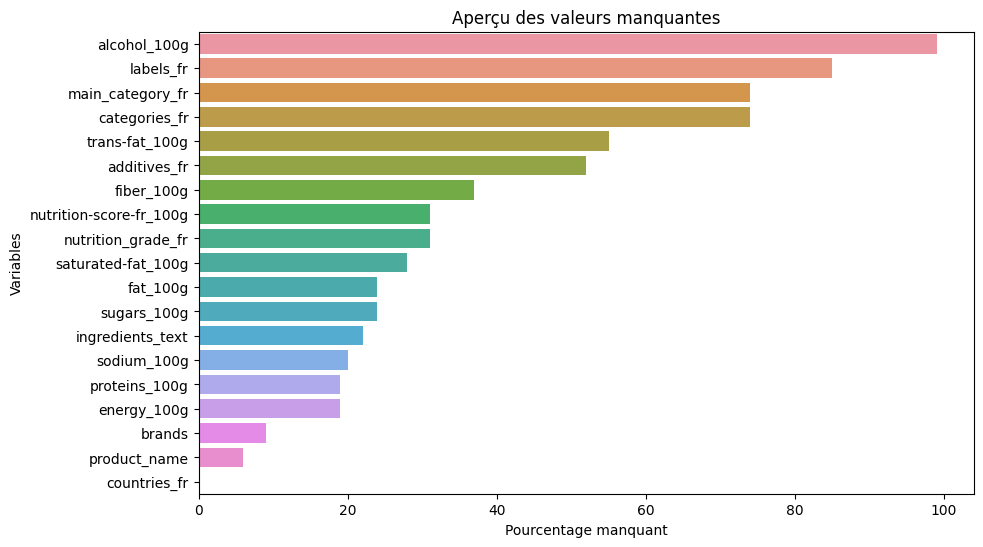

----------------------------------------------------------------------------------------------------
                                          Données manquantes :
----------------------------------------------------------------------------------------------------
                         Total manquant  Pourcentage manquant
alcohol_100g                     316639                  99.0
labels_fr                        274106                  85.0
main_category_fr                 236406                  74.0
categories_fr                    236361                  74.0
trans-fat_100g                   177474                  55.0
additives_fr                     166092                  52.0
fiber_100g                       119886                  37.0
nutrition-score-fr_100g           99562                  31.0
nutrition_grade_fr                99562                  31.0
saturated-fat_100g                91218                  28.0
fat_100g                          76881              

In [ ]:
visualize_missing_data(df)

On voir sur notre graphique, qu'il y a encore beaucoup de données manquantes. A terme, nous devons réussir à atteindre un graphique vierge qui nous permettra de créer notre analyse.

#### Modification de la colonne fiber_100g et alcohol_100g

On peut considérer que si les colonnes fiber_100g et alcohol_100g n'ont pas de données, c'est que les produits ne possédent pas de fibres ou d'alcool.

In [ ]:
df['fiber_100g'] = df['fiber_100g'].fillna(0) # On remplace chaque NaN par un 0.
df['alcohol_100g'] = df['alcohol_100g'].fillna(0) # On remplace chaque NaN par un 0.

## Suppression des valeurs manquantes :

Avant de pouvoir commencer le NLP, il va falloir nettoyer chaque colonne que l'on a choisi pour éviter d'avoir des erreurs lors du NLP.

In [ ]:
df.head()

,product_name,brands,categories_fr,countries_fr,labels_fr,ingredients_text,additives_fr,nutrition_grade_fr,main_category_fr,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,sugars_100g,fiber_100g,proteins_100g,sodium_100g,alcohol_100g,nutrition-score-fr_100g
0,Farine de blé noir,Ferme t'y R'nao,NaN,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN
1,Banana Chips Sweetened (Whole),NaN,NaN,États-Unis,NaN,"Bananas, vegetable oil (coconut oil, corn oil ...",NaN,d,NaN,2243.0,28.57,28.57,0.0,14.29,3.6,3.57,0.000,0.0,14.0
2,Peanuts,Torn & Glasser,NaN,États-Unis,NaN,"Peanuts, wheat flour, sugar, rice flour, tapio...",NaN,b,NaN,1941.0,17.86,0.00,0.0,17.86,7.1,17.86,0.250,0.0,0.0
3,Organic Salted Nut Mix,Grizzlies,NaN,États-Unis,NaN,"Organic hazelnuts, organic cashews, organic wa...",NaN,d,NaN,2540.0,57.14,5.36,NaN,3.57,7.1,17.86,0.482,0.0,12.0
4,Organic Polenta,Bob's Red Mill,NaN,États-Unis,NaN,Organic polenta,NaN,NaN,NaN,1552.0,1.43,NaN,NaN,NaN,5.7,8.57,NaN,0.0,NaN


Je vais considérer que si je ne posséde ni le product_name, ni la marque, ni la liste d'ingrédient, on va tout simplement la retirer de l'analyse.

On va également modifier les lignes de tel façon que si elle ne posséde pas assez de données pour fat_100g, sugars_100g, salt_100g on va tout simplement supprimer la ligne.

Grâce aux données de notre countries_fr, on pourra comparer les produits BIO avec les produits Organic qui correspondent sensiblement à la même chose mais avec des appelations differentes par pays.


## Visualisation par pays actuellement :

## Optimisation des colonnes et des lignes :

## Outliers ⁉

Avant de tester à supprimer on va partir du principe qu'aucun produit ne peut être inférieur à 0 et supérieur à 100 pour 100g ou 2500kcal pour l'énergie


## Suppression si manque de données sur la provenance et son entité propre :

In [ ]:
print(" Le nombre de ligne avant nettoyage est de : " , df.shape[0])

 Le nombre de ligne avant nettoyage est de :  320772


In [ ]:
"""mask = df['product_name'].isna() & df['brands'].isna() & df['ingredients_text'].isna()
df = df[~mask]"""

"mask = df['product_name'].isna() & df['brands'].isna() & df['ingredients_text'].isna()\ndf = df[~mask]"

In [ ]:
rows_to_drop = []
for index, row in df.iterrows():
    if pd.isna(row['product_name']) and pd.isna(row['brands']) and pd.isna(row['ingredients_text']):
        rows_to_drop.append(index)

df.drop(rows_to_drop, inplace=True)

In [ ]:
print(" Le nombre de ligne avant nettoyage est de : " , df.shape[0])

 Le nombre de ligne avant nettoyage est de :  307127


In [ ]:
"""mask_2 = df['sugars_100g'].isna() & df['proteins_100g'].isna() & df['fat_100g'].isna() & df['sodium_100g'].isna()
df = df[~mask_2]"""

"mask_2 = df['sugars_100g'].isna() & df['proteins_100g'].isna() & df['fat_100g'].isna() & df['sodium_100g'].isna()\ndf = df[~mask_2]"

In [ ]:
rows_to_drop_2 = []
for index, row in df.iterrows():
    if pd.isna(row['sugars_100g']) and pd.isna(row['proteins_100g']) and pd.isna(row['fat_100g']) and pd.isna(row['sodium_100g']):
        rows_to_drop_2.append(index)

df.drop(rows_to_drop_2, inplace=True)

In [ ]:
print(" Le nombre de ligne avant nettoyage est de : " , df.shape[0])

 Le nombre de ligne avant nettoyage est de :  260882


Ici, on crée un mask booléan, qui indique si cette colonne et cette colonne et cette colonne sont NaN tu retires du dataframe via le ~

In [ ]:
df

,product_name,brands,categories_fr,countries_fr,origins,labels_fr,ingredients_text,additives_fr,nutrition_grade_fr,main_category_fr,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,sugars_100g,fiber_100g,proteins_100g,sodium_100g,alcohol_100g,nutrition-score-fr_100g
1,Banana Chips Sweetened (Whole),NaN,NaN,États-Unis,NaN,NaN,"Bananas, vegetable oil (coconut oil, corn oil ...",NaN,d,NaN,2243.0,28.57,28.57,0.0,14.29,3.6,3.57,0.000000,0.0,14.0
2,Peanuts,Torn & Glasser,NaN,États-Unis,NaN,NaN,"Peanuts, wheat flour, sugar, rice flour, tapio...",NaN,b,NaN,1941.0,17.86,0.00,0.0,17.86,7.1,17.86,0.250000,0.0,0.0
3,Organic Salted Nut Mix,Grizzlies,NaN,États-Unis,NaN,NaN,"Organic hazelnuts, organic cashews, organic wa...",NaN,d,NaN,2540.0,57.14,5.36,NaN,3.57,7.1,17.86,0.482000,0.0,12.0
4,Organic Polenta,Bob's Red Mill,NaN,États-Unis,NaN,NaN,Organic polenta,NaN,NaN,NaN,1552.0,1.43,NaN,NaN,NaN,5.7,8.57,NaN,0.0,NaN
5,Breadshop Honey Gone Nuts Granola,Unfi,NaN,États-Unis,NaN,NaN,"Rolled oats, grape concentrate, expeller press...",NaN,NaN,NaN,1933.0,18.27,1.92,NaN,11.54,7.7,13.46,NaN,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320756,Test NF App,NaN,NaN,Suisse,NaN,NaN,"Coco, choco",NaN,NaN,NaN,569.0,31.00,NaN,NaN,9.60,1.1,2.10,0.433071,0.0,NaN
320757,Amandes,Biosic,NaN,France,NaN,"Bio,Bio européen,AB Agriculture Biologique",NaN,NaN,b,NaN,2406.0,NaN,3.73,NaN,3.89,12.2,21.22,0.039370,0.0,0.0
320763,Thé vert Earl grey,Lobodis,"Aliments et boissons à base de végétaux,Boisso...",France,NaN,"Commerce équitable,Bio,Bio européen,Max Havela...","thé vert, arôme naturel bergamote avec autres ...",NaN,c,Thés verts,21.0,0.20,0.20,NaN,0.50,0.2,0.50,0.010000,0.0,2.0
320768,"Mint Melange Tea A Blend Of Peppermint, Lemon ...",Trader Joe's,NaN,États-Unis,NaN,NaN,"Organic peppermint, organic lemon grass, organ...",NaN,b,NaN,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.000000,0.0,0.0


## Preprocessing via NLP :

In [ ]:
import pandas as pd
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import langid

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

### Fonction importantes :

Possibilité ici d'utiliser beautiful soup.. voir spacy pour plus de facilité ..

In [ ]:
def extract_additive_data(dataframe, column_name, new_column_name):
    column = dataframe[column_name]

    # On retire toute les majuscules ici :

    column = column.str.lower()

    # On supprime la ponctuation ici :

    column = column.str.replace(r'[^\w\s]', '')

    # On crée la tokennisation ici :

    column = column.apply(word_tokenize)

    # On supprime les stopwords ici :

    stop_words = set(stopwords.words('english'))  # On ajuste la langue ici
    column = column.apply(lambda x: [token for token in x if token not in stop_words])

    # On crée la Lemmatisation ici :

    lemmatizer = WordNetLemmatizer()
    column = column.apply(lambda x: [lemmatizer.lemmatize(token) for token in x])

    # Extraction des additifs ici :

    additives_data = column.apply(lambda x: [token for token in x if re.match(r'^[a-zA-Z\d]+$', token)])

    # On insére la nouvelle colonne dans le data frame ici :
    
    dataframe[new_column_name] = additives_data

    return dataframe
